<img SRC="cr.jpg"/>

<center><h1 Style="color:#A52A2A"> Analisis de datos</h1></center>
<center><h5> Universidad Castro Carazo</h5></center>
<center><h6> 3C - 2022</h6></center>

<p Style = "text-align: justify"> El tercer factor es el pago de pérdida promedio relativo por año de vehículo asegurado. 
            
Este valor está normalizado para todos los autos dentro de una clasificación de tamaño particular (pequeño de dos puertas, familiar, deportivo/especial, etc.), y representa la pérdida promedio por auto por año.

Nota: Varios de los atributos de la base de datos podrían utilizarse como un atributo de "clase".</p>
                                                       </br>
    
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile"> fuente de datos para el prceso de analisis    

In [1]:
import pandas as pd #se usa para el manejo de los DateFram
import numpy as np #se usa para manejo de las estructuras de datos(array, listas, tuplas, diccionarios)
import matplotlib.pyplot as plt 

<h3 Style="color:#7FFF00"> 1.2 Importar los Set de Datos</h3>

In [2]:

cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_autos=pd.read_csv("Autos 1.csv", names=cols)
df_2do_autos=pd.read_csv("autos.csv", names=cols)


In [3]:
df_1er_autos.shape

(29, 26)

In [4]:
df_2do_autos.shape

(197, 26)

In [5]:
df_1er_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669


In [6]:
df_1er_autos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
28,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_1er_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,bore,stroke,compression,horsepower,peak,City,Higway,price
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.827586,100.103448,177.186207,66.134483,54.406897,2580.000000,128.000000,3.330690,3.402069,11.475862,102.413793,4970.689655,25.896552,31.448276,11692.793103
std,1.691765,3.082726,7.178327,0.917012,1.666676,310.887325,23.653752,0.240088,0.108278,5.318610,29.382353,448.910833,5.045117,5.803855,2906.059106
min,-2.000000,94.500000,159.300000,64.000000,51.400000,2209.000000,97.000000,3.010000,3.150000,8.500000,52.000000,4200.000000,19.000000,24.000000,7775.000000
25%,-1.000000,97.300000,171.700000,65.500000,53.000000,2300.000000,109.000000,3.190000,3.350000,9.000000,85.000000,4800.000000,24.000000,28.000000,9639.000000
50%,2.000000,100.400000,176.200000,66.500000,54.900000,2536.000000,122.000000,3.270000,3.400000,9.300000,92.000000,5200.000000,24.000000,30.000000,11199.000000
75%,2.000000,102.400000,183.100000,66.900000,55.700000,2912.000000,146.000000,3.620000,3.500000,9.500000,116.000000,5400.000000,27.000000,34.000000,13415.000000
max,3.000000,104.500000,188.800000,67.700000,57.500000,3151.000000,171.000000,3.780000,3.540000,23.000000,161.000000,5500.000000,37.000000,46.000000,17669.000000


In [8]:
df_2do_autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
df_2do_autos.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [10]:
df_2do_autos.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h5> Universidad Castro Carazo</h5>

<h1 Style="color:#A52A2A">1.3Revisar los encabezados de los DataFrame</h1></center>
<p>Se motiva la estandarizacion de los nombres de las columnas, considerando lo siguiente</p>
<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco</li>
    <li>Los nombres no deben empezar con numeros</li>
    <li>Si el nombre se conforma de 2 o mas palabras la letra inicial de cada palabra va en mayuscula</li>
    <li>No deben exitir nombres repetidos</li>

In [11]:
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [12]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [13]:
df_1er_autos.rename({"engine-size":"engineSize"}, axis=1, inplace=True)
df_2do_autos.rename({"engine-size":"engineSize"}, axis=1, inplace=True)
df_1er_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [14]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engineSize', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [15]:
df_2do_autos.describe()

,symboling,base,length,width,heingt,curb,engineSize,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [16]:
df_1er_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    29 non-null     int64  
 1   normalized   29 non-null     object 
 2   make         29 non-null     object 
 3   fuel         29 non-null     object 
 4   aspiration   29 non-null     object 
 5   doors        29 non-null     object 
 6   style        29 non-null     object 
 7   wheels       29 non-null     object 
 8   engine       29 non-null     object 
 9   base         29 non-null     float64
 10  length       29 non-null     float64
 11  width        29 non-null     float64
 12  heingt       29 non-null     float64
 13  curb         29 non-null     int64  
 14  engineType   29 non-null     object 
 15  Cylinders    29 non-null     object 
 16  engineSize   29 non-null     int64  
 17  system       29 non-null     object 
 18  bore         29 non-null     float64
 19  stroke    

In [17]:
df_2do_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engineSize   197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [18]:
temp = df_1er_autos.groupby(["style"]).count()
print(temp)

             symboling  normalized  make  fuel  aspiration  doors  wheels  \
style                                                                       
convertible          2           2     2     2           2      2       2   
hardtop              2           2     2     2           2      2       2   
hatchback            7           7     7     7           7      7       7   
sedan               15          15    15    15          15     15      15   
wagon                3           3     3     3           3      3       3   

             engine  base  length  ...  engineSize  system  bore  stroke  \
style                              ...                                     
convertible       2     2       2  ...           2       2     2       2   
hardtop           2     2       2  ...           2       2     2       2   
hatchback         7     7       7  ...           7       7     7       7   
sedan            15    15      15  ...          15      15    15      15   
wago

In [19]:
temp = df_1er_autos.groupby(["style"]).count()
temp = temp.iloc[:,:1]
temp

,symboling
style,
convertible,2
hardtop,2
hatchback,7
sedan,15
wagon,3


<h3>Unir set de datos</h3>

In [20]:
unionArchivos = [df_1er_autos, df_2do_autos]
dfAutos = pd.concat(unionArchivos)
dfAutos.shape
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<h2 style='color:#4b0088'>2.Manejo de los valores faltantes o perdidos<h2/>
<p>Que se hace en este apartado?</p>
<ol>
    <li>Identificar como se muestran los valores faltantes y los estandarizamos(NaN)</li>
    <li>Contar la cantidad de valores faltantes por variables</li>
    <li>Analisis de imputacion de valores numeros con la media</li>
    <li>Analisis de imputacion de valores categoricos con el mas frecuente</li>
    <li>Eliminar filas con valores faltantes</li>
</ol>
    
<h2 style='color:#800088'>2.1 Identificar como se muestran los valores faltantes y los estandarizamos (NaN)</h2>

In [21]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [22]:
dfAutos.replace('?',np.nan,inplace = True)
dfAutos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
5,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
6,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
7,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
8,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
9,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248


In [23]:
dfAutos.tail(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,NaN,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,NaN,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


<h2 style='color:#800088'>2.2 Contar la cantidad de valores faltantes por variable</h2>

In [24]:
dfvaloresfaltantes = dfAutos.isnull()

In [25]:
dfvaloresfaltantes.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
for column in dfvaloresfaltantes.columns.values.tolist():
    print(column)
    print(dfvaloresfaltantes[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

In [27]:
dfAutos.describe()

,symboling,base,length,width,heingt,curb,engineSize,compression,City,Higway
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,0.902655,98.626991,173.929646,65.853982,53.728761,2540.597345,126.486726,10.300973,25.477876,31.044248
std,1.271672,5.611570,11.744470,2.015475,2.365420,498.165891,40.340465,4.148393,6.384143,6.767096
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,167.300000,64.200000,52.000000,2205.250000,98.000000,8.625000,20.000000,25.000000
50%,1.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,9.000000,25.000000,30.000000
75%,2.000000,101.800000,180.200000,66.500000,55.600000,2846.250000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h2 style='color:#800088'>2.3Analisis de imputacion de valores numeros con la media</h2>

<img SRC="Captura.JPG" alt ="VAlores Faltantes">

In [28]:
mean_peak= dfAutos["peak"].astype("float").mean(axis = 0)
print("La media de peak es: ",mean_peak)

La media de peak es:  5100.892857142857


In [29]:
dfAutos["peak"].replace(np.nan,5082, inplace = True)

In [30]:
mean_peak= dfAutos["normalized"].astype("float").mean(axis = 0)
print("La media de normalized es: ",mean_peak)

La media de normalized es:  122.28333333333333


In [31]:
dfAutos["normalized"].replace(np.nan, 121, inplace = True)

In [32]:
mean_peak= dfAutos["symboling"].astype("float").mean(axis = 0)
print("La media de normalized es: ",mean_peak)

La media de normalized es:  0.9026548672566371


In [33]:
dfAutos["symboling"].replace(np.nan,  0.8, inplace = True)


In [34]:
mean_peak= dfAutos["price"].astype("float").mean(axis = 0)
print("La media de normalized es: ",mean_peak)

La media de normalized es:  12780.941441441442


In [35]:
dfAutos["price"].replace(np.nan,  11047, inplace = True)

In [36]:
dfAutos["doors"].value_counts().idxmax()

'four'

In [37]:
dfAutos["doors"].replace(np.nan,"four",inplace = True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669



<h2 style='color:#800088'>2.5 Eliminar filas con valores faltantes</h2>

In [38]:
dfAutos.dropna(subset = ["price"], axis = 0 , inplace = True)
dfAutos.reset_index(drop = True, inplace = True)

In [39]:
dfvaloresfaltantes = dfAutos.isnull()
dfvaloresfaltantes.head(10)
for column in dfvaloresfaltantes.columns.values.tolist():
    print(column)
    print(dfvaloresfaltantes[column].value_counts())
    print("")


symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       4
Name: stroke, dtype: int

<h2 style='color:#006400'>3 Estandarizacion de los datos</h2>

<p> Que se hace en este apartado? </p>



<ol>
    <li>Se verifica el dominio de la variable y se ajusta, si es necesario</li>
    <li>Se convierten los valores en función de su interpretación </li>
    <li>Se normalizan los datos para que los valores distintos queden entre 0 y 1</li>
    <li>Binning</li>
</ol>



<h3 style="color: #B22222">3.1 Verificacion del dominio de variables</h3>

In [40]:
dfAutos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [41]:
dfAutos[['normalized']] = dfAutos[['normalized']].astype("int")

In [42]:

dfAutos[['bore','stroke','peak','horsepower','price']] = dfAutos[['bore','stroke','peak','horsepower','price']].astype("float")

In [43]:
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower     float64
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

In [44]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116.0,4800.0,24,30,9639.0
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116.0,4800.0,24,30,9989.0
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116.0,4800.0,24,30,11199.0


In [45]:
dfAutos["City L/100km"] = 235/dfAutos["City"]
dfAutos["Higway L/100km"] = 235/dfAutos["Higway"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,3.62,3.5,9.3,116.0,4800.0,24,30,9639.0,9.791667,7.833333
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,3.62,3.5,9.3,116.0,4800.0,24,30,9989.0,9.791667,7.833333
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,3.62,3.5,9.3,116.0,4800.0,24,30,11199.0,9.791667,7.833333


<h2 style='color:#006400'>3.3 Normalizacion de Valores</h2>

In [46]:
dftemp = dfAutos[["length","width","heingt"]]
dftemp.head(5)

,length,width,heingt
0,176.2,65.6,52.0
1,176.2,65.6,52.0
2,176.2,65.6,52.0
3,176.2,65.6,52.0
4,176.2,65.6,53.0


In [47]:
dfAutos["length"] = dfAutos["length"]/dfAutos["length"].max()
dfAutos["width"] = dfAutos["width"]/dfAutos["width"].max()
dfAutos["heingt"] = dfAutos["heingt"]/dfAutos["heingt"].max()

In [48]:
dftemp2 = dfAutos [["length", "width", "heingt" ]]

<h2 style='color:#006400'>3.4 Binning</h2>

In [64]:
dftemp = dfAutos["horsepower"]
dftemp.head(10)

0    116.0
1    116.0
2    116.0
3    116.0
4    116.0
5     92.0
6     73.0
7     92.0
8     92.0
9     92.0
Name: horsepower, dtype: float64

In [65]:
dfAutos.dtypes

symboling            int64
normalized           int32
make                object
fuel                object
aspiration          object
doors               object
style               object
wheels              object
engine              object
base               float64
length             float64
width              float64
heingt             float64
curb                 int64
engineType          object
Cylinders           object
engineSize           int64
system              object
bore               float64
stroke             float64
compression        float64
horsepower         float64
peak               float64
City                 int64
Higway               int64
price              float64
City L/100km       float64
Higway L/100km     float64
horsepowerBins    category
dtype: object

In [66]:
bins = np.linspace(min(dfAutos["horsepower"]), max(dfAutos["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [67]:
groupNames = ["bajo", "medio", "alto"]
dfAutos["horsepowerBins"] = pd.cut(dfAutos["horsepower"], bins, labels = groupNames, include_lowest = True)
dfAutos[["horsepower", "horsepowerBins"]].head(5)

,horsepower,horsepowerBins
0,116.0,bajo
1,116.0,bajo
2,116.0,bajo
3,116.0,bajo
4,116.0,bajo


In [68]:
dfAutos["horsepowerBins"].value_counts()

bajo     182
medio     40
alto       2
Name: horsepowerBins, dtype: int64

Text(0.5, 1.0, 'horsepower')

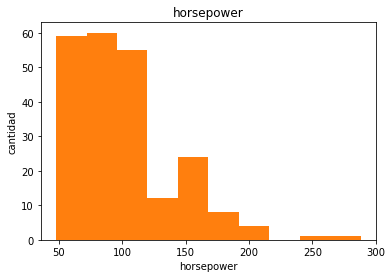

In [69]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot



plt.pyplot.hist(dfAutos["horsepower"])

plt.pyplot.hist(dfAutos["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("horsepower")

TypeError: 'value' must be an instance of str or bytes, not a float

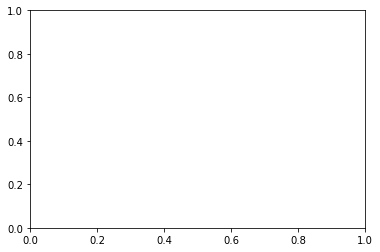

In [70]:
plt.pyplot.hist(dfAutos["horsepowerBins"])

plt.pyplot.hist(dfAutos["horsepowerBins"])
plt.pyplot.xlabel("horsepowerBins")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("horsepower")